<a href="https://colab.research.google.com/github/Bhavya-TR/BR_TR/blob/main/01640_BASF_110922.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Import Librery
```

```



In [ ]:
import pandas as pd
import numpy as np
import datetime
import os

## Exploratory Data Analysis

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Datasets/Refresh_Data_sets/01640-BASF_A.xlsx')
df.head()

,Date_old,Date,Int.Target (TR),Actual,Forecast,Cum Int.Target (TR),CumActual,CumForecast
0,200212,2002-12-31,0.1,0.1,0,0.1,0.1,0
1,200301,2003-01-31,1.0,1.0,0,1.1,1.1,0
2,200302,2003-02-28,0.8,0.8,0,1.9,1.9,0
3,200303,2003-03-31,1.2,1.2,0,3.1,3.1,0
4,200304,2003-04-30,2.2,2.2,0,5.3,5.3,0


In [ ]:
df=df.drop(columns=['Date_old','Int.Target (TR)','Forecast','Cum Int.Target (TR)','CumActual','CumForecast'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    60 non-null     datetime64[ns]
 1   Actual  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
df.rename(columns={'Date':'ds','Actual':'y'},inplace=True)

In [ ]:
df.head()

,ds,y
0,2002-12-31,0.1
1,2003-01-31,1.0
2,2003-02-28,0.8
3,2003-03-31,1.2
4,2003-04-30,2.2


In [ ]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprw32i04v/0bmwq62h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprw32i04v/xw0gyofz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51112', 'data', 'file=/tmp/tmprw32i04v/0bmwq62h.json', 'init=/tmp/tmprw32i04v/xw0gyofz.json', 'output', 'file=/tmp/tmpivtsro6t/prophet_model-20220914060427.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:04:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:04:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=0, freq='M')
future.tail()

,ds
55,2007-07-31
56,2007-08-31
57,2007-09-30
58,2007-10-31
59,2007-11-30


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
55,2007-07-31,-0.870818,-3.268890,1.499092
56,2007-08-31,-0.322209,-2.502094,1.830278
57,2007-09-30,0.054016,-2.188751,2.418470
58,2007-10-31,-1.058896,-3.382563,1.455593
59,2007-11-30,-1.743347,-3.937756,0.680425


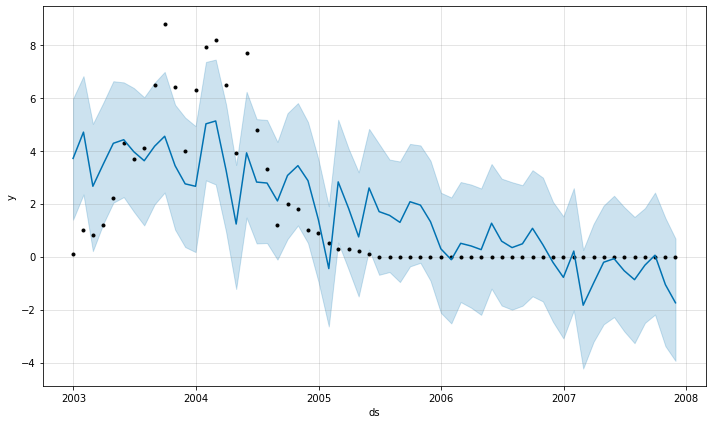

In [ ]:
fig1 = model.plot(forecast)

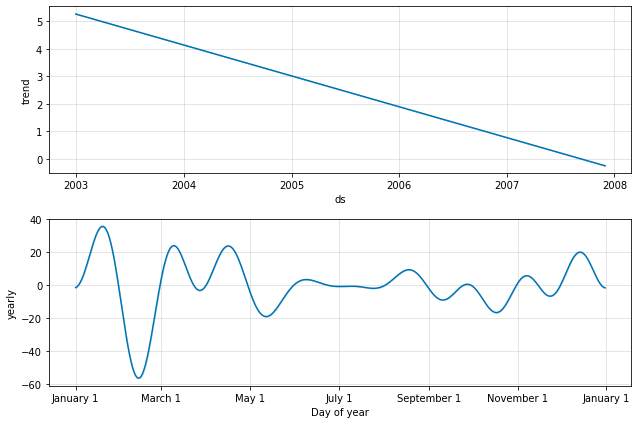

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
future = model.make_future_dataframe(periods=2, freq='M')
future.tail()

,ds
57,2007-09-30
58,2007-10-31
59,2007-11-30
60,2007-12-31
61,2008-01-31


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
57,2007-09-30,0.054016,-2.342910,2.319715
58,2007-10-31,-1.058896,-3.337829,1.111526
59,2007-11-30,-1.743347,-4.200012,0.544481
60,2007-12-31,-1.835969,-4.088789,0.653405
61,2008-01-31,0.523677,-1.710265,2.862465


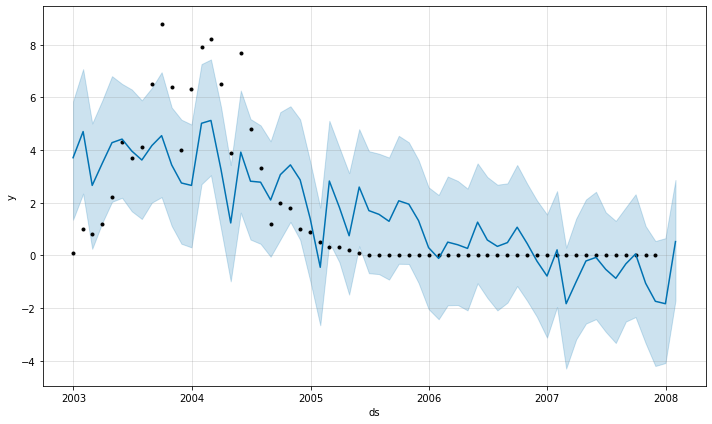

In [ ]:
fig1 = model.plot(forecast)